# **Diabetes Dataset Analysis - Manuel Castro**
#### 15/ 01/ 2022

# Context

•	Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

•	A few years ago, research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage.


# Objective
Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis. 

*Text taken from original Word document*




![image info](https://www.legendsofamerica.com/wp-content/uploads/2018/12/PimaIndiansCarloGentile1870.jpg)

Picture of Pima indians, taken from <https://www.legendsofamerica.com/wp-content/uploads/2018/12/PimaIndiansCarloGentile1870.jpg>


**Note: If you can not run this notebook locally, you can interact with the Google Collab notebook by clicking [here](https://colab.research.google.com/drive/1-mmYxuia9_XsvzwAwnz8ARIbJih34FrM?usp=sharing)**



# Exploratory Data Analysis

## What we have

In this case, a dataset was provided, it has some information about Pima tribe ladies older the 21 year and some clinical status, such as if they are diabetic or not, the blood pressure and so on.

First we will do, is import the dataset to explore it, to do that we have to import some libraries that could help us with data manipulation

In [ ]:
import pandas as pd #Data manipulation
import numpy as np #Numerical - Statstical manipulation
from plotly.subplots import make_subplots #Plots library
import plotly.express as px
import plotly.graph_objects as go #these two libraries will help us to plot the data

# These libraries help us to build, train and test the logistic regression model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Read de csv dataset and store it in a pandas dataframe
df = pd.read_csv("diabetes.csv")
df

In [ ]:
print("Missing values: ",df.isnull().sum())

Missing values:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


As you can see, we have 768 raws of data from 768 ladies and 9 variables from the investigation, and according with the dataset info there is no missing values.

Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest.


## Type of Data

Talking about what type of data we have, we can summarize it in a table as follows:

| Variable Name 	| Description 	| Measurement Unity 	| Type of varible 	|
|---	|---	|---	|---	|
| Pregnancies 	| Number of pregnancies 	|  	| Numerical - Discrete 	|
| Glucose 	| Plasma glucose concentration over 2 hours in an oral glucose tolerance test 	|  	| Numerical - Continuous 	|
| BloodPressure 	| Diastolic blood pressure  	| mm Hg 	| Numerical - Continuous 	|
| SkinThickness 	| Triceps skin fold thickness 	| mm 	| Numerical - Continuous 	|
| Insuline 	| 2-Hour serum insulin 	| mu U/ml 	| Numerical - Continuous 	|
| BMI 	| Body mass index  	| weight in kg/(height in m)^2 	| Numerical - Continuous 	|
| DiabetesPedigreeFunction 	| A function which scores likelihood of diabetes based on family history. 	|  	| Numerical - Continuous 	|
| Age 	| Age 	| Years 	| Numerical - Discrete 	|
| Outcome 	| Class variable (0: person is not diabetic or 1: person is diabetic) 	|  	| Numerical - Discrete 	|



**Note: in this case, age variable is discrete even it could be continuous, just the years as whole number were taken.**



<br>

If we want to describe the dataset, we can use describe function in pandas which show us the summary including the mean, quartiles and standard deviation of each variable. For example, the pregnamcies variable has 768 rows, and on average a Pima woman has 3.84 children (but note that it is a discrete variables, a single woman can not have 3.84 children) with a standard deviation of 3.36 which means that variable could vary from the mean with 3.36 children having a minimum of 0 childs and a max of 17. 

The 25%, 50%, and 75% quartiles indicate that 25% of ladies have 1 child or less (0), 50% have 3 childs or less, and 75% have 6 childs or less.

**Note: pregnancies are different to childs in real life because many times the number of children a women has is not always the prengancy times she have been, there are the possiblity that one of more childs are daed, but in this case let's suppose it's the same.**



In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Blood Presure

In the graph below, you will see the blood pressure distribution, that will look like a normal ditribution taking into account the central limit theorem (CLT), but there is something that looks weird: there are around 35 ladies with the blood pressure between 0 and 4, but according with [Choundhary et al.](https://www.theiaforum.org/article.asp?issn=2589-7934;year=2016;volume=17;issue=1;spage=32;epage=33;aulast=Choudhary#:~:text=Extremely%20low%20or%20zero%20DBP,arteriovenous%20malformation%2C%20and%20aortic%20dissection.) low levels of Diastolic blood pressure are seen in cases related with diabetes, our main investigation problem.

In [medicine](https://my.clevelandclinic.org/health/diseases/21156-low-blood-pressure-hypotension#:~:text=Low%20blood%20pressure%20(hypotension)%20occurs,severe%20enough%20to%20cause%20symptoms.), a normal diastolic blood pressure is less than 80, and higher than 80 could be considered as High Blood Pressure. 

The table above suggests that around 75% of Pima ladies have a normal pressure, 25% have a higher blood pressure and the plot suggests that 35 are in risk of hypotension.


As you will see below, this variable is not well correlated with diabetes.


In [ ]:
fig = go.Figure()
fig.add_traces(go.Histogram(x =df["BloodPressure"]))
fig.update_layout(title="Blood Pressure distribution")
fig.update_xaxes(title="Blood Pressure in mm Hg")
fig.update_yaxes(title="Frequency")
fig.show()

#	What is the 'BMI' for the person having the highest 'Glucose'?

The BMI of the person with the highest glucose is 42.9 whith a glucose of 199 and an outcome of 1, being a diabetic lady.

In [ ]:
d = df[df["Glucose"]== max(df["Glucose"])]
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1


#	Are the three measures of central tendency equal?

Even they are not 100% equal, the BMI mean, median and mode tend to be the same: 32, in the other variables the result are different

In [ ]:
print("Dataframe Mean: \n",df.mean(), "\n\n")
print("Dataframe Median: \n",df.median(), "\n\n")
print("Dataframe Mode: \n",df.mode().iloc[0,:], "\n\n")

Dataframe Mean: 
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64 


Dataframe Median: 
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64 


Dataframe Mode: 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               70.000
SkinThickness                0.000
Insulin                      0.000
BMI                         32.000
DiabetesPedigr

# How many women's Glucose level is above the mean level of 'Glucose'?

There are 349 womens with glucose above 120.89 which is the glucose mean.

In [ ]:
d = df[df["Glucose"]> df["Glucose"].mean()]
print("Womens with glucose above the mean: ",len(d))


Womens with glucose above the mean:  349


# Create the pairplot for variables 'Glucose', 'SkinThickness' and  DiabetesPedigreeFunction'. 


The pairplot shows us the variable frequency in the diagonal, that allows us to undestand how data is distributed, for example DiabetesPedigree looks like a gamma distribution indicating that are few womens with a high risk of being diabetic based on their family antecedents. The skinthickness density plot actually shows that there are a considerable number of womens with low triceps skin fold thickness.

By other side, the scatter plots are symetrical around the diagonal and help us to undertand how dots (womens) are grouped in a kind of "cloud" or better said a cluster.

At the beginnig of the analysis there were not found missing data, but note that it could be weird to see "perfect" lines in scatter plots, such as glucose vs. skinthickness, where you can see a line in skinthickness equal to 0. Maybe there is no missing data because there were inputed by zeros. This technique is not bad at all, but there are better ways to inpute missing data such as Nearest Neighbor method or just replacing it by some measure of central tendency, but with the information we wave it is not possible to determine.

Nevertheless, you can see that in glucose vs. skinthickness there is a single cluster that can not help us to determine or gruop womens by the outcome variables. Something similar occurs in glucose vs. diabetes pedigree where we do not have a clear cluster that could help us in the investigation about diabetes outcome.

In conclusion, there is not strong relations among those variables and either strong clusters for outcome variable. 


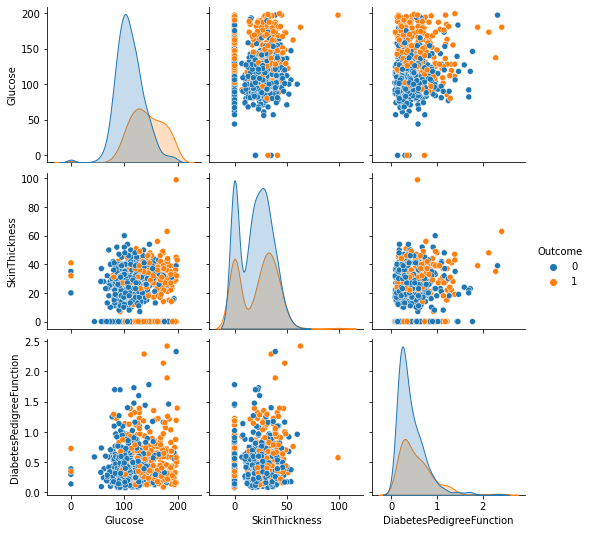

In [ ]:
import seaborn
import matplotlib.pyplot as plt
  
seaborn.pairplot(df[["Glucose", "SkinThickness", "DiabetesPedigreeFunction", "Outcome"]], hue = "Outcome")
plt.show()

#	Plot the scatterplot between 'Glucose' and 'Insulin'. Write your observations from the plot.

In the previous plot, we saw that there were not strong clusters among variables and outcome, in this case occurs something similar but note that data looks directly proportional, if Glucose increses, Insuline increses too, but there is also an increase in dispersion.

Here, in insulin variable you can appreciate the same problem seen before, there is a line in 0 values that could affect the analysis and posterior data usage.

In [ ]:
fig = px.scatter(df, x="Glucose", y="Insulin", color="Outcome", title="Glucose vs. Insuline")
fig.show()

#	Plot histograms for variable Age to understand the number of women in different Age groups given that they have diabetes or not. Explain both histograms and compare them.

The histogram shows that both outcomes (diabetic and non diabetic ladies) do not change over age because the distribution looks very similar between the two outcomes and there is not two different courves that indicates that the older the woman is larger the probability of being diabetic.

Again, here we do not have a strong correlation or clustering with diabetic outcome, so we can not conclude that elder womens are more lakely to be diabetic.

In [ ]:
fig = px.histogram(df, x="Age", color="Outcome", title="Age histogram by Outcome").for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.show()

# What is Inter Quartile Range of all the variables? Why is it used? Which plot visualizes the same?

The IQR of variables could be obtained from the summary table above or calculating the dataset quantiles and substracting Q1 from Q3 as show below.

By the other hand we could use boxplots to see IQRs, actually the IQR is the box itself, the dots are outliers (+- 1.5 times the IQR from the IQR).

The lower fence is calculated by substracting 1.5 IQR to Q1 and the upper fence is calculated by adding 1.5 IQR to Q3

In [ ]:
iqr = df.quantile([.25, .75]).T
iqr.columns = ["Q1", "Q3"]
iqr["IQR"] = iqr["Q3"] - iqr["Q1"]
iqr

,Q1,Q3,IQR
Pregnancies,1.00000,6.00000,5.0000
Glucose,99.00000,140.25000,41.2500
BloodPressure,62.00000,80.00000,18.0000
SkinThickness,0.00000,32.00000,32.0000
Insulin,0.00000,127.25000,127.2500
BMI,27.30000,36.60000,9.3000
DiabetesPedigreeFunction,0.24375,0.62625,0.3825
Age,24.00000,41.00000,17.0000
Outcome,0.00000,1.00000,1.0000


In [ ]:
fig = make_subplots(rows=4, cols=2)

row = 1
var = 0
names  = list(df.columns)
while row <= 4:
  col = 1
  while col <= 2:

    fig.add_trace( go.Box(x=df["Outcome"], y=df[names[var]] , name = names[var]) ,   row=row, col=col)

    var = var+1
    col = col + 1

  row = row + 1


fig.update_layout(height=1600,  title_text="Boxplot Outcome vs. Dataset variables")
fig.show()


As the boxplots shows, there is not a strong difference among all the variables and tha outcome, you can see that pregnancy and glucose variables could have the biggest difference between diabetic ladies and non diabetic ladies, but it is not enough for deriving a conclusion from that because even you know that diabetes is highly correlated with glucose (suggar levels) you can not determine if a person will be diabetic just measuring its glucose levels isolatedly. 

At this point we can see the problem with another set of eyes and face it from another way.

# Find and visualize the the correlation matrix. Write your observations from the plot.

We can plot the correlation matrix of the dataset in order to know which variables are more related with the others and maybe find ones that could help to predict the diabetes outcome.




In [ ]:
import plotly.graph_objects as go

z = df.corr()

fig = go.Figure(data=go.Heatmap( z=z, x=names,   y=names,  hoverongaps = False))
fig.show()


from tabulate import tabulate


In [ ]:
values = z["Outcome"].values
names  = z["Outcome"].index

out = pd.DataFrame(names)
out.columns = ["Variable"]
out["Corr. index"] = values
out = out.sort_values(by ="Corr. index", ascending=False)
out

,Variable,Corr. index
8,Outcome,1.000000
1,Glucose,0.466581
5,BMI,0.292695
7,Age,0.238356
0,Pregnancies,0.221898
6,DiabetesPedigreeFunction,0.173844
4,Insulin,0.130548
3,SkinThickness,0.074752
2,BloodPressure,0.065068


Among the Outcome variable there is not at least one strong correlation being strong greater than 0.50 and very strong grater than 0.75, however the glucose, BMI and age could be useful variables for prediction models. 

By other side, we can see this by a descriptibe approach instead of inferential, because [medice](https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444) have proved that there are factors such as weight, race, age, family history could influence diabetes. In this case even we have some of those variables they are not strongly correlated as would be expected.



# What is your recommendation for the missing values in the data? How do you think we can counter it?

Taking into account previous discussions the dataset does not contain missing values but it contains strange values that could come from wrong data inputations and consequently it could affect the way data is correlated, sometimes is better to know that there is a missing value rather than inpute it with random values.

This is a problem that could be faced by using some imputationt techniques such as K- Nearest Neighbor, using the mode, mean and median or using a more complex algorithm but the problem is still the same: we do not know which ones are the inputed values in the dataset, and even we could approximate them based on what we see in the pairplots, we do not know certainly if there are other values that were manipulated.

In conclusion, we can not predict with a 100% of accuracy which values were changed or inputed but we can work with the approximation we can derive from data and tools we have.



# What your recommendation for modelling? 

At this point, I would recommend to get a better knowledge for the original dataset and know which and how missing values were filled, and a big picture comprehension and understanding for antropoligical and biological behavior in this type of tribes and towns in order to know if there are more variables that could affecte our variable of interest: if a women is diabetic or not.

Finally I invite you to visualize and get in touch with a simple logistic regression model, below you will see how accurate is a possible prediction model using the variables . 

In [ ]:
# We use a logistic model beacause we want to predict a boolean variable

X = df[["Glucose"]]
y = df["Outcome"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#Create a Logistic Regression
logreg = LogisticRegression()

#Fit the model with training dataset
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Predicting Outcome using just Glucose variable as predictor:\n")
print("Confusion matrix: \n",cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Percentage of predicted diabetic womens that are actually diabetic + Percentage of non diabetic womens that are actually non diabetic
print("Precision:",metrics.precision_score(y_test, y_pred)) #Percentage of predicted diabetic womens that are actually diabetic

Predicting Outcome using just Glucose variable as predictor:

Confusion matrix: 
 [[116  14]
 [ 31  31]]
Accuracy: 0.765625
Precision: 0.6888888888888889
Recall: 0.5


In [ ]:
X = df[["Glucose", "BMI"]]
y = df["Outcome"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#Create a Logistic Regression
logreg = LogisticRegression()

#Fit the model with training dataset
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Predicting Outcome using just Glucose and BMI as predictors:\n")
print("Confusion matrix: \n",cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Percentage of predicted diabetic womens that are actually diabetic + Percentage of non diabetic womens that are actually non diabetic
print("Precision:",metrics.precision_score(y_test, y_pred)) #Percentage of predicted diabetic womens that are actually diabetic

Predicting Outcome using just Glucose and BMI as predictors:

Confusion matrix: 
 [[116  14]
 [ 29  33]]
Accuracy: 0.7760416666666666
Precision: 0.7021276595744681
Recall: 0.532258064516129


In [ ]:
X = df[["Glucose", "BMI", "Age"]]
y = df["Outcome"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#Create a Logistic Regression
logreg = LogisticRegression()

#Fit the model with training dataset
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Predicting Outcome using just Glucose variable as predictor:\n")
print("Confusion matrix: \n",cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Percentage of predicted diabetic womens that are actually diabetic + Percentage of non diabetic womens that are actually non diabetic
print("Precision:",metrics.precision_score(y_test, y_pred)) #Percentage of predicted diabetic womens that are actually diabetic


Predicting Outcome using just Glucose variable as predictor:

Confusion matrix: 
 [[115  15]
 [ 28  34]]
Accuracy: 0.7760416666666666
Precision: 0.6938775510204082


In [ ]:
p = 1
y = df["Outcome"]

top_predictors = []
accuracy = []

preds = out["Variable"].tolist()
preds.pop(0)


while p < len(out):    
 
  X = df[preds[0:p]]
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)  
  logreg = LogisticRegression()
  
  logreg.fit(X_train,y_train)
  y_pred=logreg.predict(X_test)  

  accuracy.append(metrics.accuracy_score(y_test, y_pred))
  top_predictors.append(p) 

  p = p +1


fig = go.Figure()
fig.add_traces(go.Scatter(x=top_predictors, y = accuracy, mode = "lines + markers" ))
fig.update_layout(title="Model Accuracy vs. Top Predictors Number")
fig.update_xaxes(title="Top Predictors")
fig.update_yaxes(title="Model Accuracy")
fig.show()




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



The graph above shows us how the logistic model can be improved by using top N predictors from the "out" table. Best said, the model can predict succesfully if a women is diabetic or not 79.16% of the times when trained with 
Glucose, BMI, Age, Pregnancies, DiabetesPedigreeFunction and 	Insulin.  Variables skinthickness and BloodPressure could be ignored.


**Note: this is just an example of what we can do with the current dataset, surely there are some other classification Machine Learning algorithms that could have a better performance than this one.**


If you can not run this notebook locally, you can interact with the Google Collab notebook by clicking [here](https://colab.research.google.com/drive/1-mmYxuia9_XsvzwAwnz8ARIbJih34FrM?usp=sharing)